In [ ]:
# install nessesary librarys to interact with kaggle
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
#linking through api
import json, os

kaggle_json_content = """
{
  "username": "adityasmagrawal",
  "key": "38998fce7dd0b7066abce10cff406bfa"
}
"""

with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(json.loads(kaggle_json_content), f)


!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# downloading the dataset
!kaggle competitions download -c plant-seedlings-classification

 99% 1.67G/1.69G [00:16<00:00, 139MB/s]
100% 1.69G/1.69G [00:16<00:00, 108MB/s]


In [ ]:
import os
import random

In [ ]:
! pip install pillow

In [ ]:
from PIL import Image

In [ ]:
import zipfile

In [ ]:
zip_path = '/content/plant-seedlings-classification.zip'
extract_to = '/content/'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
# zipfile.ZipFile is a python modlue used to work with zip files
# 'r' stands for read only
    zip_ref.extractall(extract_to)
print("File extracted successfully.")

File extracted successfully.


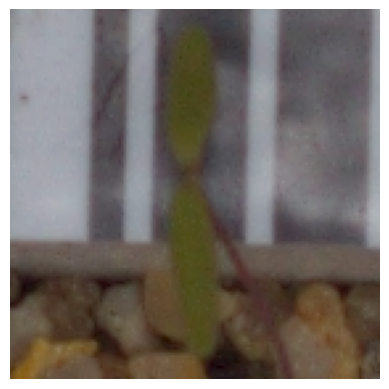

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = '/content/train/Fat Hen/00268e97d.png'
#assigns the path of the image file to a variable
image = Image.open(image_path)
#the above line uses the Image.open()function to open the image located at the specified path
# Display the image using matplotlib-
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
print(image.format)
print(image.size)
print(image.mode)

PNG
(140, 140)
RGB


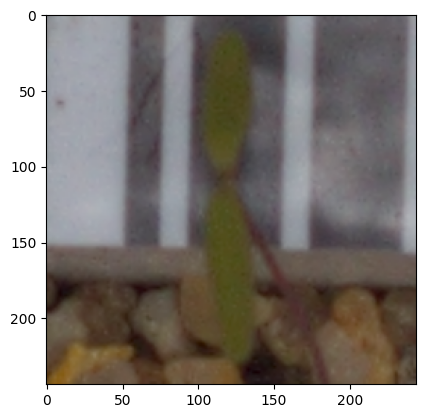

In [ ]:
resize_image = image.resize((244,244))
plt.imshow(resize_image)#to display image
# plt.axis('on')
# plt.show() #-> this is to display whatever we made

In [ ]:
from PIL import ImageEnhance #PIL - python image enhancer

In [ ]:
from PIL import ImageFilter

In [ ]:
from PIL import ImageDraw, ImageFont

In [ ]:
for file_name in os.listdir('train//'):
#the os.listdir returns a list of all fils and directories in the spe
  if file_name.endswith(".png"):
    img = Image.open(f"train/file_name")
    #resizing is a part of image preprossesing
    img = img.resize((128,128))
    img.save(f"resized/{file_name}")


In [ ]:
# # Data agumentation
# # grayscalling the images
# for filename in os.listdir('train/'):
#     if filename.endswith(".png"):
#         image_path = os.path.join('train/', filename)
#         img = Image.open(image_path)
#         img = img.convert("L")
#         output_path = os.path.join('gray', filename)
#         img.save(output_path)

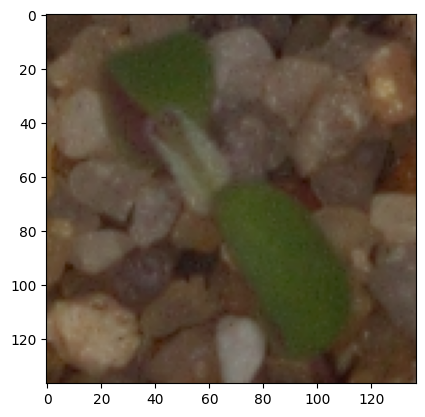

In [ ]:
image = Image.open('train/Fat Hen/008f1b92d.png')
plt.imshow(image)

In [ ]:
path_dataset = 'train/'
image_files = sorted([i for i in os.listdir(path_dataset) if i.endswith('png')])
#in this if the condition is satisfied then the 'i' is put into that folder

In [ ]:
# Data Splliting -
from sklearn.model_selection import train_test_split

In [ ]:
!pip install keras

In [ ]:
# Converting Data to tensors -
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    # rescale=1./255,
    validation_split=0.0,  # No validation set
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
)
# try checking the accureacy with and without this

In [ ]:
train_generator = datagen.flow_from_directory(
    'train/',
    target_size = (120,120),#resize images to this
    batch_size = 64,
    class_mode = 'categorical',#tells the generator to create one hot encoded lables for images based on thier subfolders
    subset = 'training',#this tells the generator to load only the training subset of the data
    shuffle = True,
)
# here we are labeling the images with the names of their respective folders
# we do that by taking the paths of the images in a list and
# the subfolders names as the lables in another list
path_dataset = 'train/'  # Your training data directory
image_paths = []
labels = []

for class_folder in os.listdir(path_dataset):
    class_path = os.path.join(path_dataset, class_folder)
    for image_file in os.listdir(class_path):
        image_paths.append(os.path.join(class_path, image_file))

        labels.append(class_folder)  # Assuming folder names are class labels

Found 4750 images belonging to 12 classes.


In [ ]:
# Shuffle image paths and labels
combined = list(zip(image_paths, labels))
random.shuffle(combined)
image_paths[:], labels[:] = zip(*combined)

In [ ]:
# this below code is for validation purpose use it only when validation is to be done to avoide overfitting
# validation_generator = datagen.flow_from_directory(
#     'train/',
#     target_size=(120, 120),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'  # Use the validation subset
# )

In [ ]:
#Building the modle
#CNN Modle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# # Define the CNN model
# # modle is a variable that stores the cnn model object , name used to refer the model
# # keras.Sequential is a function that creates a 'Sequential' Model
# model = keras.Sequential([
#     # Convolutional layers for feature extraction
# #layers.Conv2D() is a function that creates a 2D convolutional layer
# # in this the first argument 32 is the no. of kernels in the first layer
# # the second argument is the size of filters i.e. in this case 3 pixels wide and 3 px. high
# # the next argument sets the activaiton function to ReLU
# # next arg. -> defines the shape of the imput images expected by the model 3,means 3 color channels - RGB(only for the first layer)
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)),
# # this function creates a max pooling layer
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),


#     # Flatten the output for the dense layers
#     layers.Flatten(),

#     # Dense layers for classification
#     layers.Dense(256, activation='relu'),
#     layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(12, activation='softmax')  # 12 output classes
# ])
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), #removed one convolution layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), #removed one convolution layer
    layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(256, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),


    # Flatten the output for the dense layers
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(128, activation='relu'), #removed one dense layer
    #layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(12, activation='softmax')  # 12 output classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# optimizer -> updating weights and biases ,
# orptimizer = 'adam' -> algorithm that auto adjusts the learning rate
# model.compile(optimizer='adam',
#the following is defining a loss function , we use the given cause it's used in mulitclass classification
              # loss='categorical_crossentropy',
# metrics is a way to monitor the progress and performance , we are using accuracy here
              # metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam #importing the optimizer
from tensorflow.keras.callbacks import ReduceLROnPlateau # importing ReduceLROnPlateau
optimizer = Adam(learning_rate=0.001)  # Lower learning rate
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = Adam(learning_rate=0.001)  # Lower learning rate
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# the following line iniciates the training process , the results of the training process
# are strored in the history variable
history = model.fit(
    train_generator,
    # validation_data=validation_generator,
    epochs=10,  # Adjust the number of epochs
    #ensures that the model sees all the training data in one epoch -
    steps_per_epoch=len(train_generator),
    # validation_steps=len(validation_generator)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 606ms/step - accuracy: 0.1078 - loss: 8.1722
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 73s 569ms/step - accuracy: 0.2036 - loss: 2.3598
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 561ms/step - accuracy: 0.3740 - loss: 1.8522
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 92us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 569ms/step - accuracy: 0.4627 - loss: 1.5469
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 550ms/step - accuracy: 0.5512 - loss: 1.3155
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
# first we calculate the loss and acuracy and then print them
loss, accuracy = model.evaluate(train_generator, steps=len(train_generator))
print("Training Loss:", loss)
print("Training Accuracy:", accuracy)
#replace with test_generator

75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 609ms/step - accuracy: 0.5797 - loss: 1.2069
Training Loss: 1.222841739654541
Training Accuracy: 0.5741052627563477


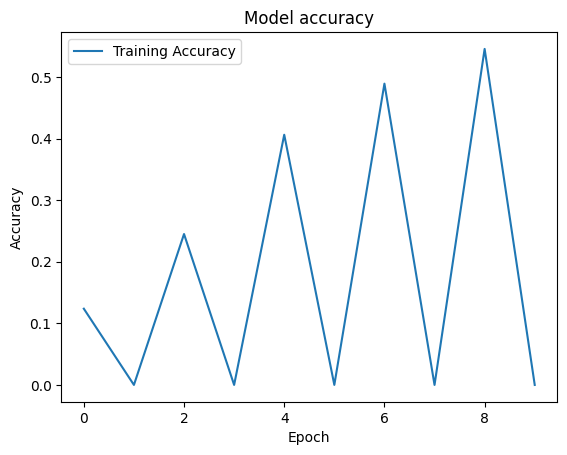

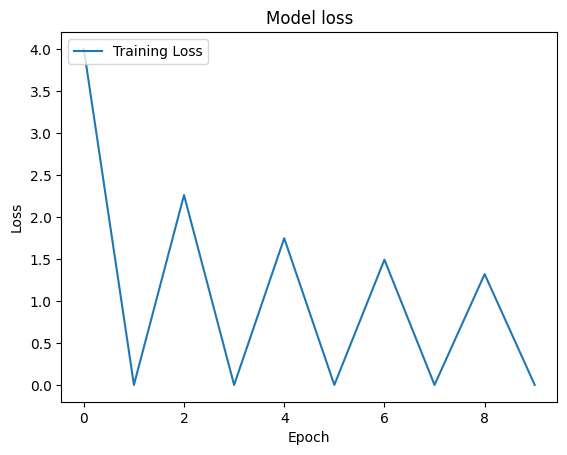

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Removed
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')  # Removed
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.save('plant_seedling_classifier.h5')

In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('plant_seedling_classifier.h5')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np

# Load the saved model
model = keras.models.load_model('plant_seedling_classifier.h5')

# Path to the image you want to predict
image_path = '/content/train/Fat Hen/00268e97d.png'  # Replace with your image path

# Load and preprocess the image
img = Image.open(image_path)
img = img.resize((120, 120))  # Resize to match model input shape
img_array = np.array(img)
img_array = img_array / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  #

In [ ]:
predictions = model.predict(img_array)  # Get predictions from the model
predicted_class_index = np.argmax(predictions)  # Find index of the highest probability

print(f"Predicted class index: {predicted_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
Predicted class index: 6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted class index: 6


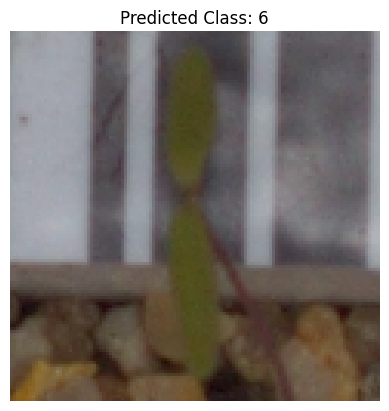

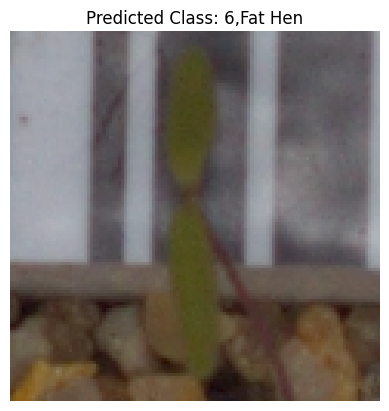

In [ ]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


model = keras.models.load_model('plant_seedling_classifier.h5')


image_path = '/content/train/Fat Hen/00268e97d.png'

img = Image.open(image_path)
img = img.resize((120, 120))
img_array = np.array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

print(f"Predicted class index: {predicted_class_index}")


plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_index}")
plt.axis('off')
plt.show()
import os



image_path = '/content/train/Fat Hen/00268e97d.png'




folder_name = os.path.basename(os.path.dirname(image_path))


plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_index},{folder_name}")
plt.axis('off')
plt.show()